## Método 1: Entropía

In [31]:
## Fuente: https://www.kaggle.com/code/banddaniel/how-to-calculate-the-entropy-of-an-image

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage.util import random_noise
from skimage import io,img_as_float,img_as_ubyte

In [8]:
working_dir = os.path.join(os.getcwd(), 'working')
os.makedirs(os.path.join(working_dir, 'Original'), exist_ok=True)
os.makedirs(os.path.join(working_dir, 'Low_Noise'), exist_ok=True)
os.makedirs(os.path.join(working_dir, 'High_Noise'), exist_ok=True)

In [25]:
def create_noisy_dataset(main_path):
    """
    :param string main_path: main path of dataset (exp. '/kaggle/input/panda-or-bear-image-classification/PandasBears/Train/Bears')
    :param string target_path: target path of new datasets (exp. '/kaggle/working/Train/Bears/')
    """
    images_dir = os.listdir(main_path+'/Original')
    
    for i in images_dir:
      
        # original image
        img_original = io.imread(main_path + "/Original/"+i)        
        io.imsave(main_path + '/tmp/original_' +i , img_as_ubyte(img_original))

        # image array and convertin uint8
        img_arr = np.asarray(img_original, dtype='uint8')
        
        # creating low noised image
        img_low_noise = random_noise(img_arr , mode='gaussian', var = 0.1**2)
        io.imsave(main_path + '/Low_Noise/LN_' +i , img_as_ubyte(img_low_noise))
        
        # creating high noised image
        img_high_noise = random_noise(img_arr , mode='gaussian', var = 0.6**2)
        io.imsave(main_path + '/High_Noise/HN_' +i , img_as_ubyte(img_high_noise))

    print('new datasets created')

In [26]:
create_noisy_dataset(working_dir)

new datasets created


In [35]:
def create_entropies_list(path):
    
    main_dir = os.listdir(path)

    images_mean_entropy = []
    
    for i in main_dir:
        img_path = os.path.join(path, i )
        img = skimage.io.imread(img_path)
        img = skimage.color.rgb2gray(img)
        entropy = skimage.measure.shannon_entropy(img)
    
        images_mean_entropy.append(entropy)
        
        
    return images_mean_entropy

def create_image_list(path):
    """
    Crea una lista con los nombres de las imágenes en el directorio especificado.
    
    :param string path: ruta al directorio de imágenes
    :return: lista de nombres de las imágenes
    """
    main_dir = os.listdir(path)
    image_names = []
    
    for i in main_dir:
        image_names.append(i)
        
    return image_names


In [ ]:
original = create_entropies_list(working_dir + '/tmp')
low_noised = create_entropies_list(working_dir + '/Low_Noise')
high_noised = create_entropies_list(working_dir + '/High_Noise')
image_names = create_image_list(working_dir + '/Original')

In [41]:
entropy_table = pd.DataFrame(list(zip(image_names, original, low_noised, high_noised )) ,
                             columns=['name', 'normal_img', ' low_noised', 'high_noised'])
entropy_table

,name,normal_img,low_noised,high_noised
0,panda.jpeg,14.154218,16.497409,19.003657
1,panthera-tigris-.jpeg,15.436296,16.953669,18.714095
2,pexels-7inchs-11552022.jpg,13.492522,16.509308,19.703010
3,pexels-crisdip-35358-128756.jpg,12.955176,16.357799,19.416966
4,pexels-lone-jensen-431642-2156316.jpg,8.531757,15.202428,19.030592
5,pexels-nahuel-robledo-336304060-18115025.jpg,9.811120,14.574818,19.182774
6,pexels-photo-1036269.jpeg,12.246582,16.693013,19.319942
7,pexels-photo-1085542.jpeg,6.322350,12.214801,17.798012
8,pexels-photo-10962808.jpeg,18.078673,18.554256,19.299933
9,pexels-photo-12563378.jpeg,16.471128,17.655593,19.469749


<Axes: >

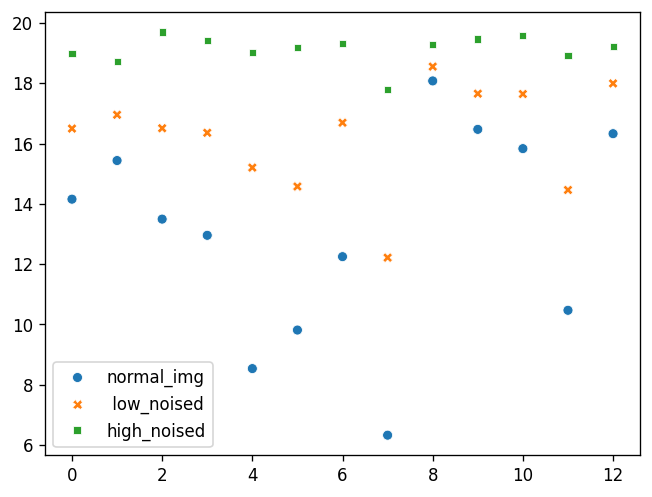

In [30]:
plt.figure( dpi=120 )
sns.scatterplot(data = entropy_table  )

## Método 2: Dimensión fractal

In [ ]:
## Source: https://github.com/brian-xu/FractalDimension/blob/master/FractalDimension.py

In [2]:
import numpy as np
import cv2

def fractal_dimension(image: np.ndarray) -> np.float64:
    """ Calculates the fractal dimension of an image represented by a 2D numpy array.

    The algorithm is a modified box-counting algorithm as described by Wen-Li Lee and Kai-Sheng Hsieh.

    Args:
        image: A 2D array containing a grayscale image. Format should be equivalent to cv2.imread(flags=0).
               The size of the image has no constraints, but it needs to be square (m×m array).
    Returns:
        D: The fractal dimension Df, as estimated by the modified box-counting algorithm.
    """
    M = image.shape[0]  # image shape
    G_min = image.min()  # lowest gray level (0=white)
    G_max = image.max()  # highest gray level (255=black)
    G = G_max - G_min + 1  # number of gray levels, typically 256
    prev = -1  # used to check for plateaus
    r_Nr = []

    for L in range(2, (M // 2) + 1):
        h = max(1, G // (M // L))  # minimum box height is 1
        N_r = 0
        r = L / M
        for i in range(0, M, L):
            boxes = [[]] * ((G + h - 1) // h)  # create enough boxes with height h to fill the fractal space
            for row in image[i:i + L]:  # boxes that exceed bounds are shrunk to fit
                for pixel in row[i:i + L]:
                    height = (pixel - G_min) // h  # lowest box is at G_min and each is h gray levels tall
                    boxes[height].append(pixel)  # assign the pixel intensity to the correct box
            stddev = np.sqrt(np.var(boxes, axis=1))  # calculate the standard deviation of each box
            stddev = stddev[~np.isnan(stddev)]  # remove boxes with NaN standard deviations (empty)
            nBox_r = 2 * (stddev // h) + 1
            N_r += sum(nBox_r)
        if N_r != prev:  # check for plateauing
            r_Nr.append([r, N_r])
            prev = N_r
    x = np.array([np.log(1 / point[0]) for point in r_Nr])  # log(1/r)
    y = np.array([np.log(point[1]) for point in r_Nr])  # log(Nr)
    D = np.polyfit(x, y, 1)[0]  # D = lim r -> 0 log(Nr)/log(1/r)
    return D

In [7]:
def create_fractal_dimensions_list(path):
    
    main_dir = os.listdir(path)

    images_f_dims = []
    
    for i in main_dir:
        img_path = os.path.join(path, i)
        print(f'Processing {img_path}...')
        image = cv2.imread(img_path, 0)        
        fd = fractal_dimension(image)
    
        images_f_dims.append(fd)
        
        
        
    return images_f_dims

In [12]:
working_dir = os.path.join(os.getcwd(), 'working')
image_folder = working_dir + '\Original'

fd_list = create_fractal_dimensions_list(image_folder)

fd_table = pd.DataFrame(list(zip(image_names, fd_list )) ,
                             columns=['name', 'fractal_dimension'])
fd_table

Processing c:\Users\akoun\Desktop\Biocruces\siburmuin\src\notebooks\working\Original\panda.jpeg...
Processing c:\Users\akoun\Desktop\Biocruces\siburmuin\src\notebooks\working\Original\panthera-tigris-.jpeg...
Processing c:\Users\akoun\Desktop\Biocruces\siburmuin\src\notebooks\working\Original\pexels-7inchs-11552022.jpg...


KeyboardInterrupt: 